In [1]:
from fake_scope import FakeSCPITektronix
instr = FakeSCPITektronix()

In [3]:
instr.ask('*IDN?')

'TEKTRONIX,MSO3014,234234,V.34.123'

In [8]:
instr.ask('CH1:SCA?')

'10'

In [5]:
instr.write('CH1:SCA 10')

In [95]:
class SCPI(object):
    def __init__(self, instr):
        self._instr = instr

    def scpi_ask(self, cmd):
        cmd = cmd if cmd.endswith('?') else cmd + '?'
        return self._instr.ask(cmd)

    def scpi_write(self, cmd, *args):
        """ Execute a SCPI command

        for example :
        inst.scpi_write('FREQ', 1234)
        """
        arg_str = ','.join(str(elm) for elm in args)
        self._instr.write(cmd + ' ' + arg_str)

    def scpi_ask_for_float(self, cmd):
        """Ask an convert to float"""
        out = self.scpi_ask(cmd)
        try : 
            return float(out)
        except ValueError:
            raise Exception(f'Cannot convert {out!r} to float')
        
class TektronixScope(SCPI):
    def get_idn(self):
        return tuple(self.scpi_ask('*IDN?').split(','))
    
    idn = property(get_idn)
    
    def get_channel_scale(self, channel_number):
        # CH1:SCA?
        cmd = f"CH{channel_number}:SCA?"
        return self.scpi_ask_for_float(cmd)
    
    def set_channel_scale(self, channel_number, value):
        # CH1:SCA xx
        cmd = f"CH{channel_number}:SCA"
        self.scpi_write(cmd, value)
        
    @property
    def channel1_scale(self):
        return self.get_channel_scale(1)
    
    @channel1_scale.setter
    def channel1_scale(self, value):
        self.set_channel_scale(1, value)
        
    @property
    def vertical_offset(self):
        return self.scpi_ask_for_float('WFMO:YOF')

    @property
    def vertical_multiplication_factor(self):
        return self.scpi_ask_for_float('WFMO:YMU')
                
    def get_waveform(self):
        data = self._instr.ask_raw('CURVE?')
        header_length = int(data[1:2])
        header = data[2:2+header_length]
        array_size = int(header)
        data = data[2 + header_length:2 + header_length + array_size ]
        data =  np.frombuffer(data, dtype=np.dtype('int16').newbyteorder('>'))        
        return (data-self.vertical_offset)*self.vertical_multiplication_factor
        
    
scope = TektronixScope(instr)
print(scope.get_idn())
print(scope.idn)
scope.set_channel_scale(1, 5)
print(scope.get_channel_scale(1))
#type(scope.get_channel_scale(1))

('TEKTRONIX', 'MSO3014', '234234', 'V.34.123')
('TEKTRONIX', 'MSO3014', '234234', 'V.34.123')
5.0


In [96]:
scope.channel1_scale = 3
scope.channel1_scale


3.0

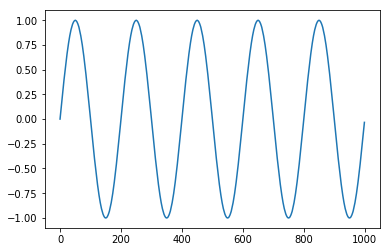

In [97]:
from matplotlib.pyplot import figure
%matplotlib inline

fig = figure()
ax = fig.subplots(1, 1)

data = scope.get_waveform()
ax.plot(data)

In [31]:
ord('\n')

10

In [33]:
hex(ord('a'))

'0x61'

In [34]:
'\x61'

'a'

In [71]:
s = b'#40004\x0a\x0e\x10\x18'

In [72]:
s[0]
header_length = int(s[1:2])
header = s[2:2+header_length]
array_size = int(header)
data = s[2 + header_length:2 + header_length + array_size ]

In [73]:
data

b'\n\x0e\x10\x18'

In [74]:
import numpy as np
np.frombuffer(data, dtype='int8')

array([10, 14, 16, 24], dtype=int8)

In [62]:
s = b'#40004\x0a\x0e\x10\x18'
int(b'4')

4

In [63]:
s = 'Bonjour'
s[1]

'o'

In [69]:
s = b'Bonjour'
s[:1]

b'B'

In [68]:
type(s[1])

int

In [ ]:
s = '58'
s[0]*10**1
s[1]*10**0